# Required libraries
Basic libraries and imports that will (might) be needed to generate the sample visualizations shown in examples below.

In [18]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *

# Regression decision tree
The default orientation of tree is top down but you can change it to left to right using `orientation="LR"`.<br>` view()` gives a pop up window with rendered graphviz object.

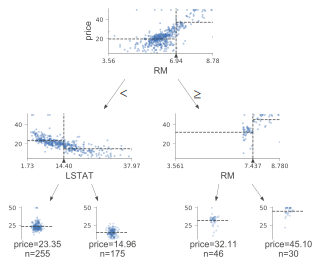

In [19]:
regr = tree.DecisionTreeRegressor(max_depth=2)
boston = load_boston()
regr.fit(boston.data, boston.target)

viz = dtreeviz(regr,
               boston.data,
               boston.target,
               target_name='price',
               feature_names=boston.feature_names)
              
viz

# Classification decision tree
An additional argument of `class_names` giving a mapping of class value with class name is required for classification trees.

In [20]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
print("Target name:\n",iris.target_names)
iris_df.head()

Target name:
 ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


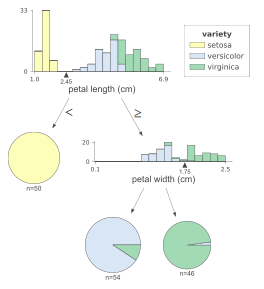

In [21]:
classifier = tree.DecisionTreeClassifier(max_depth=2)  # limit depth of tree
classifier.fit(iris.data, iris.target)

viz = dtreeviz(classifier, 
               iris.data, 
               iris.target,
               target_name='variety',
              feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
              )  
              
viz

# Prediction path
Highlights the decision nodes in which the feature value of single observation passed in argument X falls. Gives feature values of the observation and highlights features which are used by tree to traverse path.

In [22]:
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
# print("Target name:\n",diabetes.target_names)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


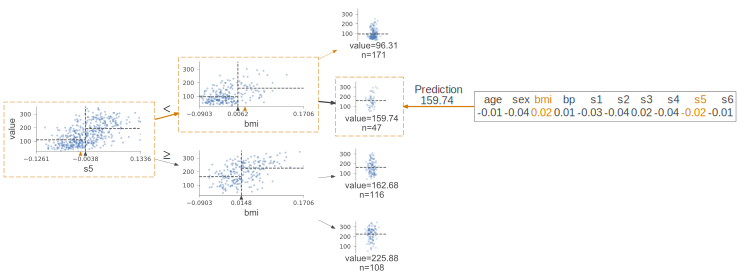

In [23]:
regr = tree.DecisionTreeRegressor(max_depth=2)  # limit depth of tree
regr.fit(diabetes.data, diabetes.target)
X = diabetes.data[np.random.randint(0, len(diabetes.data)),:]  # random sample from training

viz = dtreeviz(regr,
               diabetes.data, 
               diabetes.target, 
               target_name='value', 
               orientation ='LR',  # left-right orientation
               feature_names=diabetes.feature_names,
               X=X)  # need to give single observation for prediction
              
viz

In [24]:
X

array([-0.00551455, -0.04464164,  0.02397278,  0.00810087, -0.03459183,
       -0.03889169,  0.02286863, -0.03949338, -0.01599827, -0.01350402])

# Decision tree without scatterplot or histograms for decision nodes
Simple tree without histograms or scatterplots for decision nodes. Use argument `fancy=False`

In [27]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
print("Target name:\n",cancer.target_names)
cancer_df.head()

Target name:
 ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


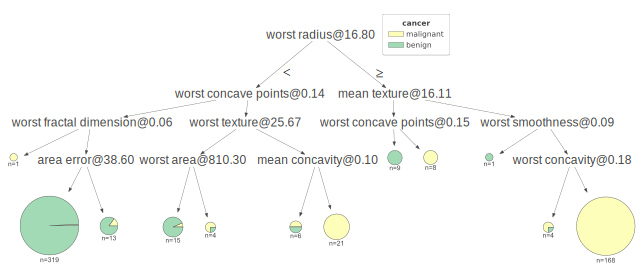

In [26]:
classifier = tree.DecisionTreeClassifier(max_depth=4)  # limit depth of tree
classifier.fit(cancer.data, cancer.target)

viz = dtreeviz(classifier,
              cancer.data,
              cancer.target,
              target_name='cancer',
              feature_names=cancer.feature_names, 
              class_names=["malignant", "benign"],
              fancy=False )  # fance=False to remove histograms/scatterplots from decision nodes
              
viz